In [444]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

In [474]:
Nfrm = 25
fps = 10

In [697]:
def generate(X, Y, phi):
    '''
    Generates Z data for the points in the X, Y meshgrid and parameter phi.
    '''
    R1 = np.sin(np.sqrt((X-5)**2 + (Y-5)**2) + phi)
    R2 = np.sin(np.sqrt((X+5)**2 + (Y+5)**2) + phi)
    R = R2 + R1
    return R / 4

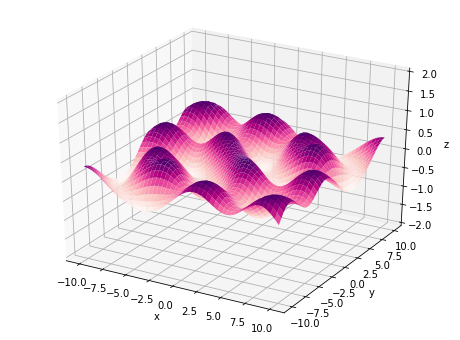

In [698]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-10, 10, 50)
ys = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Begin plotting.
# wframe = None
surface = None
Z = generate(X, Y, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    global surface
    # If a line collection is already remove it before drawing.
    if wframe or surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    # wframe = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='k', linewidth=0.5)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdPu', edgecolor='none')
phis = np.linspace(0, 180. / np.pi, 100)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=1000/fps)

In [683]:
plt.rcParams['animation.html'] = 'html5'
ani